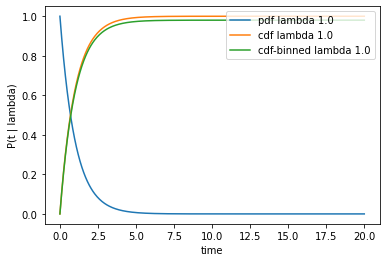

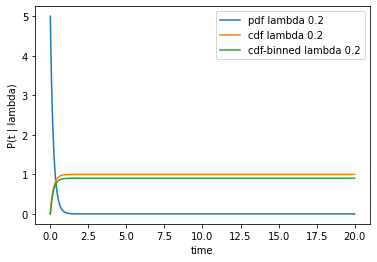

PDF(t=0.1|lambda = 1.0) = 0.9048374199009684
PDF(t=0.1|lambda = 0.2) = 3.032653298563167
inc =  0.008333333333333333
P(0.1-inc < t < 0.1+inc|lambda = 1.0) = 0.015080798209877552
P(0.1-inc < t < 0.1+inc|lambda = 0.2) = 0.050558847976441446


In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

# the exponential pdf
# P(t| lamb) = exp^{-t/lamb} / Z(lamb, a, b)
#
def expon_pdf(t, lamb, a, b):
    z = lamb * (np.exp(-a/lamb) - np.exp(-b/lamb))
    pdf = np.exp(-t/lamb)/z
    return pdf

# the exponential cdf
# F(t| lamb) = int_{a}^{t} exp^{-t/lamb} / Z(lamb, a, b)
# F(t| lamb) = Z(lamb, a, t) / Z(lamb, a, b)
#
def expon_cdf(t, lamb, a, b):
    z   = lamb * (np.exp(-a/lamb) - np.exp(-b/lamb))
    num = lamb * (np.exp(-a/lamb) - np.exp(-t/lamb))
    cdf = num/z
    return cdf

# we can calculate the CDF numerically from the PDF
#
def expon_cdf_numeric(lamb, a, b, nbin):
    cdf = [0]*(nbin)
    
    sum = 0;
    bsize = (b - a) / nbin
        
    cdf[0] = 0
   
    n = 1
    t = a + n*bsize
    while (n < nbin):
        sum += expon_pdf(t, lamb, a, b)*bsize
        cdf[n] = cdf[n-1] + expon_pdf(t, lamb, a, b)*bsize           
        n += 1
        t += bsize
        
    return cdf
    


a = 0
b = 20
nbin = 500
t = np.linspace(a, b, nbin)
pdf_p1  = expon_pdf(t,  1.0, a, b) # lambda = 1.0
cdf_p1  = expon_cdf(t,  1.0, a, b) # lambda = 1.0
cdf_p1b = expon_cdf_numeric(1.0, a, b, nbin) # lambda = 1.0

pdf_p2  = expon_pdf(t,  0.2, a, b) # lambda = 0.2
cdf_p2  = expon_cdf(t,  0.2, a, b) # lambda = 0.2
cdf_p2b = expon_cdf_numeric(0.2, a, b, nbin) # lambda = 0.2

plt.plot(t, pdf_p1,  label='pdf lambda 1.0')
plt.plot(t, cdf_p1,  label='cdf lambda 1.0')
plt.plot(t, cdf_p1b, label='cdf-binned lambda 1.0')
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("P(t | lambda)")
plt.show()

plt.plot(t, pdf_p2,  label='pdf lambda 0.2')
plt.plot(t, cdf_p2,  label='cdf lambda 0.2')
plt.plot(t, cdf_p2b, label='cdf-binned lambda 0.2')
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("P(t | lambda)")
plt.show()


# calculate the P(t=0.1| lambda=1.0)
# calculate the P(t=0.1| lambda=0.2)

# For a continous distribution, we cannot use the PDF straight to 
# do that calculation.
print('PDF(t=0.1|lambda = 1.0) =', expon_pdf(0.1, 1.0, a, b))
print('PDF(t=0.1|lambda = 0.2) =', expon_pdf(0.1, 0.2, a, b))

# In fact, it does not make sense to talk about 
# the Prob of a particular value of a continous random variable
#
# What we can calculate is the probabilty of the event happening 
# in a small window around the desired value.

# Here we calculate the probability of the event happening 
# in a 1 second (1/60 minutes) interval around t=0.1 minutes

inc = 1/120
print("inc = ", inc)
print('P(0.1-inc < t < 0.1+inc|lambda = 1.0) =', 
      expon_cdf(0.1+inc, 1.0, a, b) - expon_cdf(0.1-inc, 1.0, a, b))

print('P(0.1-inc < t < 0.1+inc|lambda = 0.2) =', 
      expon_cdf(0.1+inc, 0.2, a, b) - expon_cdf(0.1-inc, 0.2, a, b))
